In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Image arithmetic

Image arithmetic is simply **element-wise sum of matrix**. 

But when working with images, we need to keep in mind the numerical limits of our color space and data type.

Under normal arithmetic rules, we would end up with a value of 260. However, since we represent RGB images as 8-bit unsigned integers who can only take on values in the range [0, 255], 260 is not a valid value.

OpenCV will perform clipping and ensure pixel values never fall outside the range [0, 255].

In [3]:
cv2.add(np.uint8([255]), np.uint8([1]))

array([[255]], dtype=uint8)

In [4]:
cv2.subtract(np.uint8([1]), np.uint8([255]))

array([[0]], dtype=uint8)

NumPy will perform modulus arithmetic and "wrap around."

In [5]:
np.add(np.uint8([255]), np.uint8([1]))

array([0], dtype=uint8)

In [6]:
np.subtract(np.uint8([1]), np.uint8([255]))

array([2], dtype=uint8)

Image arithmetic used for
1. Adjusting brightness and contrast by adding or subtracting a set amount
2. Working with alpha blending and transparency
3. Creating Instagram-like filters

### Adjusting brightness and contrast

In [7]:
img = cv2.imread('./images/apple.jpg', cv2.IMREAD_UNCHANGED)

In [8]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

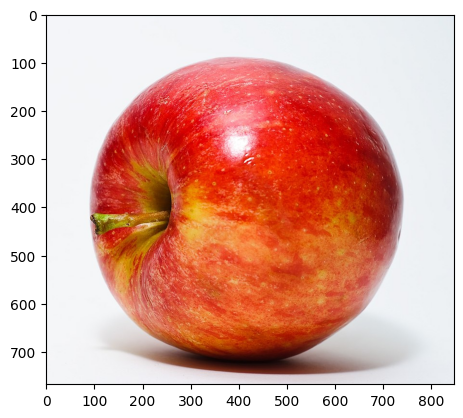

In [9]:
plt.imshow(img)
plt.show()

In [10]:
brighter = np.full_like(img, 100, dtype="uint8")

In [11]:
img_brighter = cv2.add(img, brighter)

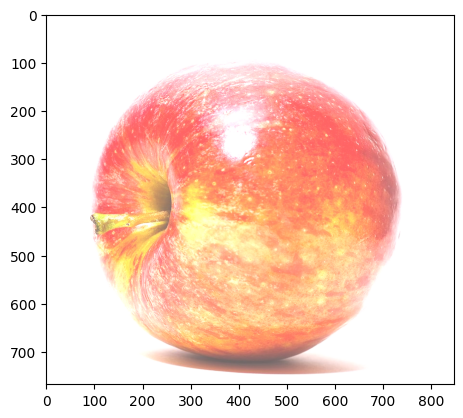

In [12]:
plt.imshow(img_brighter)
plt.show()

In [13]:
darker = np.full_like(img, 50, dtype="uint8")

In [14]:
img_darker = cv2.subtract(img, darker)

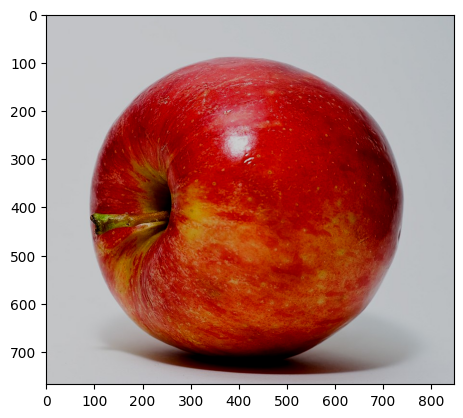

In [15]:
plt.imshow(img_darker)
plt.show()

### Image thresholding

Image thresholding comes in 3 forms:
1. **Simple thresholding**: manually supply parameters to segment the image. This works extremely well in controlled lighting conditions where we can ensure high contrast between the foreground and background of the image.

2. **Otsu’s thresholding**: more dynamic and automatically compute the optimal threshold value based on the input image.

3. **Adaptive thresholding**: instead of trying to threshold an image globally using a single value, breaks the image down into smaller pieces, and thresholds each of these pieces separately and individually.

**Simple Thresholding**

Applying simple thresholding methods requires human intervention. We must specify a threshold value T. 

All pixel intensities below T are set to 255. And all pixel intensities greater than T are set to 0.

In [16]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

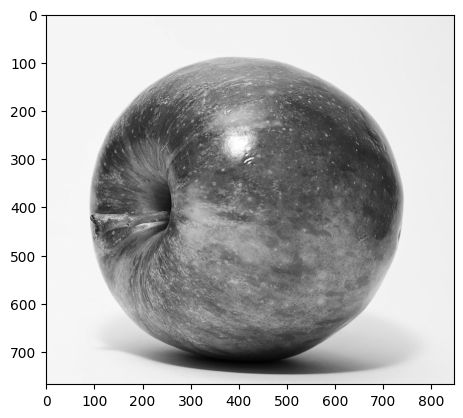

In [17]:
plt.imshow(img_gray, cmap="gray")
plt.show()

Applying Gaussian blurring helps remove some of the high frequency edges in the image that we are not concerned with and allow us to obtain a more "clean" segmentation.

In [18]:
img_blur = cv2.GaussianBlur(img_gray, (7, 7), 0)

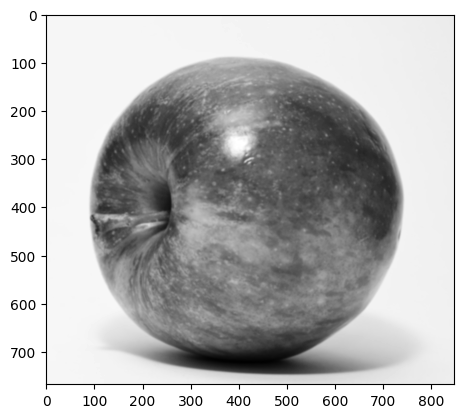

In [19]:
plt.imshow(img_blur, cmap="gray")
plt.show()

In [20]:
(T, img_thresh) = cv2.threshold(img_blur, 200, 255, cv2.THRESH_BINARY_INV)

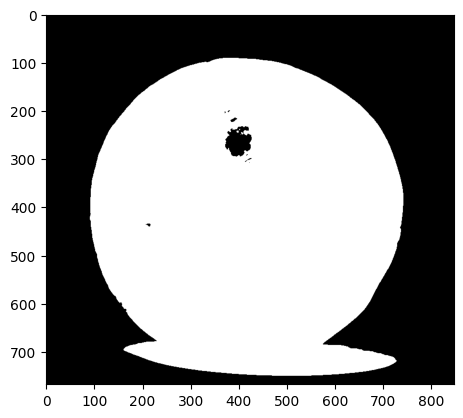

In [21]:
plt.imshow(img_thresh, cmap="gray")
plt.show()

In [22]:
img_mask = cv2.bitwise_and(img, img, mask=img_thresh)

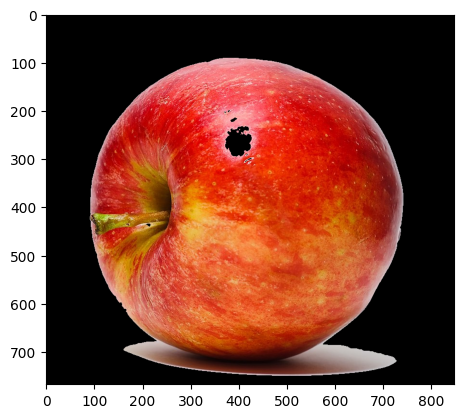

In [23]:
plt.imshow(img_mask)
plt.show()

**Otsu's Thresholding**

In real-world conditions where we do not have any a priori knowledge of the lighting conditions, we actually automatically compute an optimal value of T using Otsu’s method.

Otsu’s method assumes that our image contains two classes of pixels: the background and the foreground

Otsu’s method makes the assumption that the grayscale histogram of our pixel intensities of our image is bi-modal, which simply means that the histogram is two peaks.

Based on the grayscale histogram, Otsu’s method then computes an optimal threshold value T such that the variance between the background and foreground peaks is minimal.

In [24]:
# no a priori knowledge
(T, img_thresh) = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

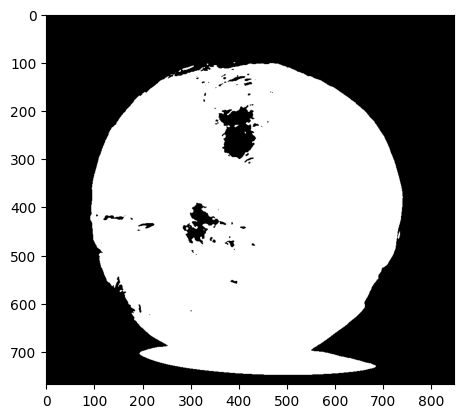

In [25]:
plt.imshow(img_thresh, cmap="gray")
plt.show()

In [26]:
img_mask = cv2.bitwise_and(img, img, mask=img_thresh)

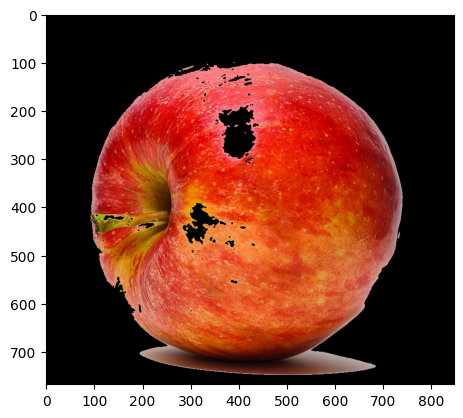

In [27]:
plt.imshow(img_mask)
plt.show()

**Adaptive Thresholding**

Having just one value of T may not suffice.

To overcome this problem, we can use adaptive thresholding, which considers small neighbors of pixels and then finds an optimal threshold value T for each neighbor.

The general assumption that underlies all adaptive and local thresholding methods is that smaller regions of an image are more likely to have approximately uniform illumination.

However, choosing the size of the pixel neighborhood for local thresholding is absolutely crucial.

The neighborhood must be large enough to cover sufficient background and foreground pixels, otherwise the value of T will be more or less irrelevant.

In [28]:
img_thresh = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 4)

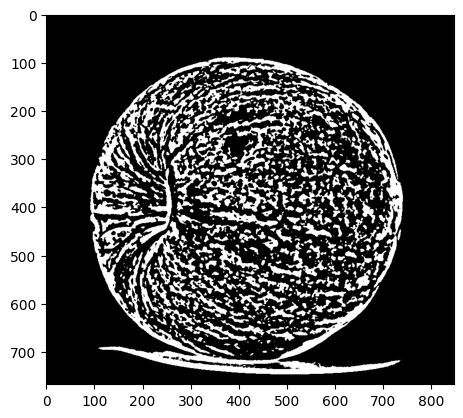

In [29]:
plt.imshow(img_thresh, cmap="gray")
plt.show()

In [30]:
img_mask = cv2.bitwise_and(img, img, mask=img_thresh)

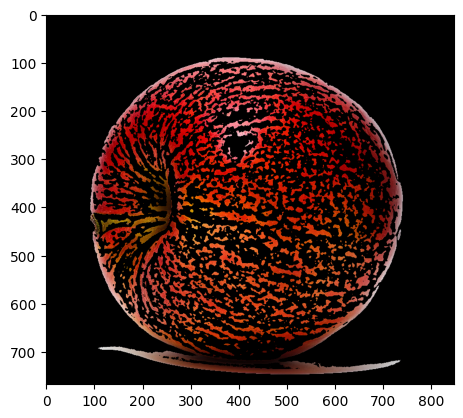

In [31]:
plt.imshow(img_mask)
plt.show()

Image threshold applications:
1. Image segmentation
2. Background removal
3. Optical Character Recognition (OCR)
4. Create a binary image

### Bitwise operations

1. **AND**: A bitwise AND is true if and only if both pixels are greater than zero.
2. **OR**: A bitwise OR is true if either of the two pixels is greater than zero.
3. **XOR**: A bitwise XOR is true if and only if one of the two pixels is greater than zero, but not both.
4. **NOT**: A bitwise NOT inverts the “on” and “off” pixels in an image.

In [32]:
rectangle = np.zeros((300, 300), dtype="uint8")

In [33]:
rectangle = cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)

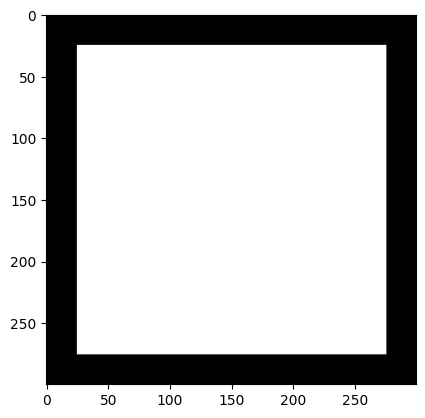

In [34]:
plt.imshow(rectangle, cmap="gray")
plt.show()

In [35]:
circle = np.zeros((300, 300), dtype="uint8")

In [36]:
circle = cv2.circle(circle, (150, 150), 150, 255, -1)

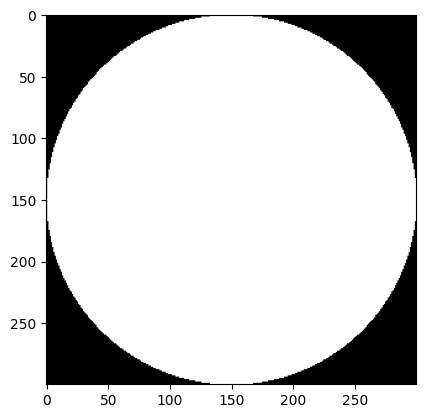

In [37]:
plt.imshow(circle, cmap="gray")
plt.show()

**Bitwise AND**

In [38]:
rectangle_and_circle = cv2.bitwise_and(rectangle, circle)

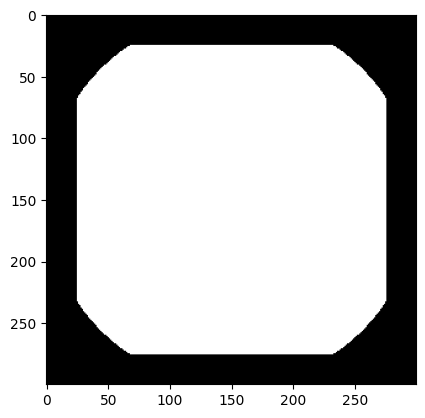

In [39]:
plt.imshow(rectangle_and_circle, cmap="gray")
plt.show()

**Bitwise OR**

In [40]:
rectangle_or_circle = cv2.bitwise_or(rectangle, circle)

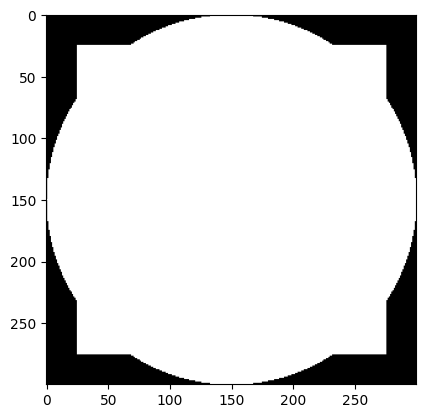

In [41]:
plt.imshow(rectangle_or_circle, cmap="gray")
plt.show()

**Bitwise XOR**

In [42]:
rectangle_xor_circle = cv2.bitwise_xor(rectangle, circle)

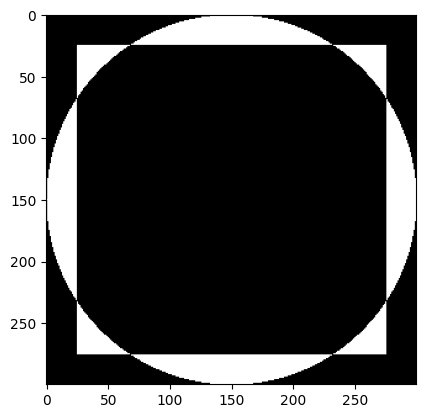

In [43]:
plt.imshow(rectangle_xor_circle, cmap="gray")
plt.show()

**Bitwise NOT**

In [44]:
not_rectangle = cv2.bitwise_not(rectangle)

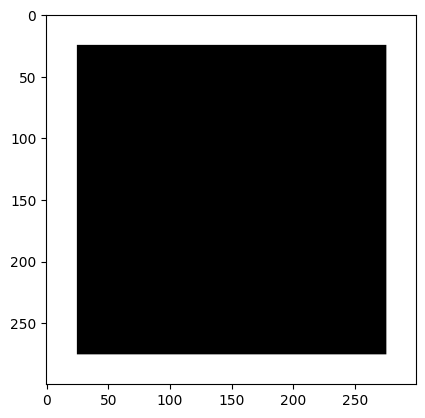

In [45]:
plt.imshow(not_rectangle, cmap="gray")
plt.show()

### Image masking

This allows us to extract regions from images that are of completely arbitrary shape.

In [46]:
row, col, channel = img.shape

In [47]:
mask = np.zeros((row, col), dtype="uint8")

In [48]:
mask = cv2.circle(mask, (400,400), 320, 255, -1)

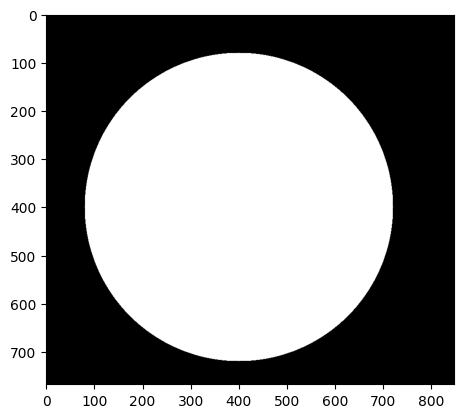

In [49]:
plt.imshow(mask, cmap="gray")
plt.show()

In [50]:
img_mask = cv2.bitwise_and(img, img, mask=mask)

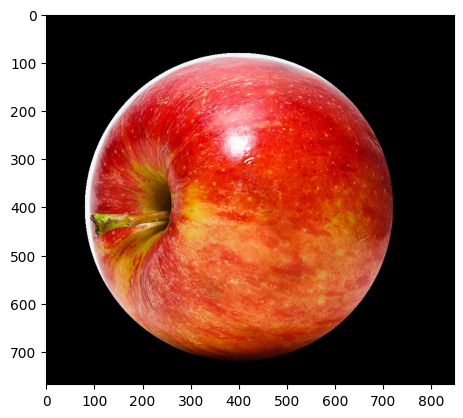

In [51]:
plt.imshow(img_mask)
plt.show()

### Image blending and alpha channel

Alpha blending is the process of overlaying a foreground image with transparency over a background image

Transparency is often the fourth channel of an image ( e.g. in a transparent PNG), but it can also be a separate image

This transparency mask is often called the alpha mask or the alpha matte.

At every pixel of the image, we need to combine the foreground image color ($F$) and the background image color ($B$) using the alpha mask ($\alpha$)

In [52]:
foreground = cv2.imread('./images/pooh.png', cv2.IMREAD_UNCHANGED)

In [53]:
foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)

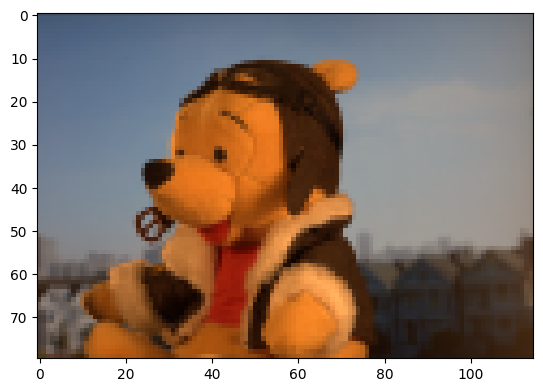

In [54]:
plt.imshow(foreground)
plt.show()

In [55]:
foreground = foreground.astype(np.float32)

In [56]:
row, col, channel = foreground.shape

In [57]:
background = cv2.imread('./images/sample.png', cv2.IMREAD_UNCHANGED)

In [58]:
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)

In [59]:
background = cv2.resize(background, (col, row))

In [60]:
background = background.astype(np.float32)

In [61]:
alpha_mask = cv2.imread('./images/alpha-pooh.png', cv2.IMREAD_UNCHANGED)

In [62]:
alpha_mask = cv2.cvtColor(alpha_mask, cv2.COLOR_BGR2RGB)

In [63]:
alpha_mask = alpha_mask.astype(np.float32)

 Normalize the alpha mask to keep intensity between 0 and 1

In [64]:
alpha_mask /= 255

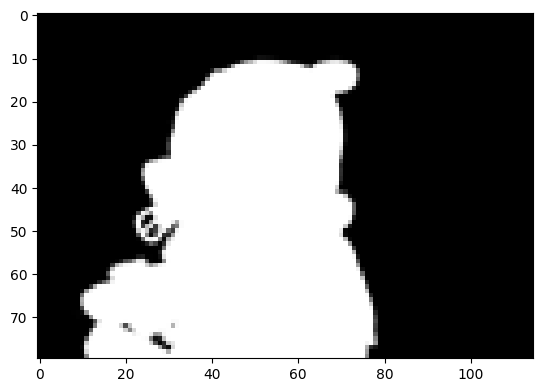

In [65]:
plt.imshow(alpha_mask)
plt.show()

$I = \alpha F + (1 - \alpha) B$

- When $\alpha$ = 0, the output pixel color is the background
- When $\alpha$ = 1, the output pixel color is the foreground
- When 0 < $\alpha$ < 1, the output pixel color is a mix of the background and the foreground. For realistic blending, the boundary of the alpha mask usually has pixels between 0 and 1.

In [66]:
foreground = cv2.multiply(alpha_mask, foreground)

In [67]:
background = cv2.multiply(1.0 - alpha_mask, background)

In [68]:
img_blend = cv2.add(foreground, background)

In [69]:
img_blend /= 255

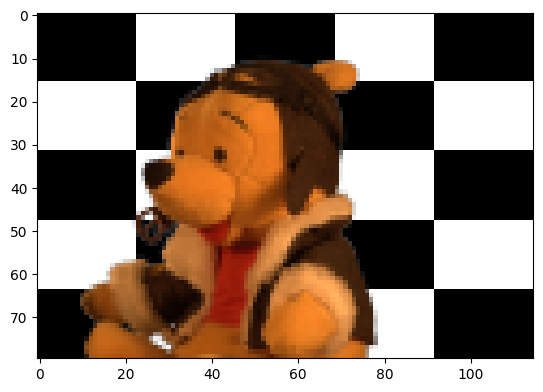

In [70]:
plt.imshow(img_blend)
plt.show()

### Morphological Operations

Morphological operations are used to shapes and structures inside of images

In [106]:
img = cv2.imread('./images/text.png', cv2.IMREAD_UNCHANGED)

In [107]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [112]:
(T, img_thresh) = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY_INV)

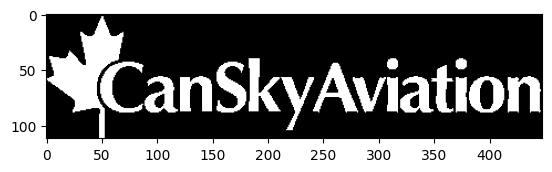

In [113]:
plt.imshow(img_thresh, cmap="gray")
plt.show()

**Erosion**

Erosion in an image "erodes" the foreground object and makes it smaller. Erosion works by defining a structuring element and then sliding this structuring element from left-to-right and top-to-bottom across the input image

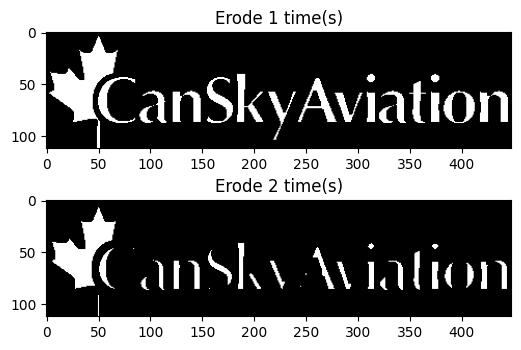

In [118]:
fig, axes = plt.subplots(2, 1, figsize=(6, 4))

for idx in range(2):
    iteration = idx + 1
    img_erode = cv2.erode(img_thresh, None, iterations=iteration)

    axes[idx].imshow(img_erode, cmap="gray")
    axes[idx].set_title(f"Erode {iteration} time(s)")

plt.show()

**Dilation**

Dilations increase the size of foreground objects and are especially useful for joining broken parts of an image together.

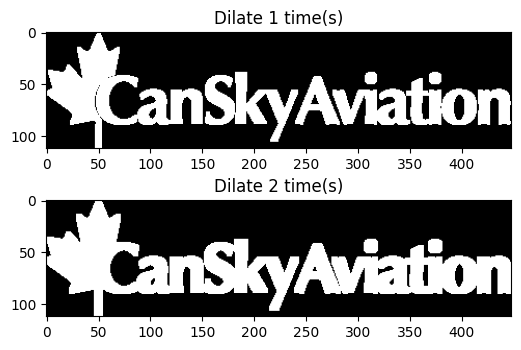

In [119]:
fig, axes = plt.subplots(2, 1, figsize=(6, 4))

for idx in range(2):
    iteration = idx + 1
    img_erode = cv2.dilate(img_thresh, None, iterations=iteration)

    axes[idx].imshow(img_erode, cmap="gray")
    axes[idx].set_title(f"Dilate {iteration} time(s)")

plt.show()

**Opening**

An opening is an erosion followed by a dilation.

Performing an opening operation allows us to remove small blobs from an image: first an erosion is applied to remove the small blobs, then a dilation is applied to regrow the size of the original object

In [120]:
kernels = [(3, 3), (5, 5)]

Structuring element defines the neighborhood to be examined around each pixel

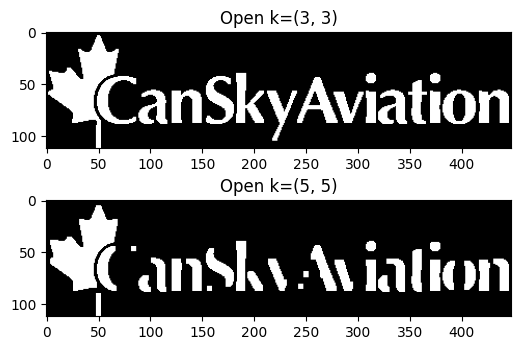

In [124]:
fig, axes = plt.subplots(2, 1, figsize=(6, 4))

for idx, kernel in enumerate(kernels):
    element = cv2.getStructuringElement(cv2.MORPH_RECT, kernel)
    img_open = cv2.morphologyEx(img_thresh, cv2.MORPH_OPEN, element)

    axes[idx].imshow(img_open, cmap="gray")
    axes[idx].set_title(f"Open k={kernel}")

plt.show()

**Closing**

A closing is a dilation followed by an erosion.

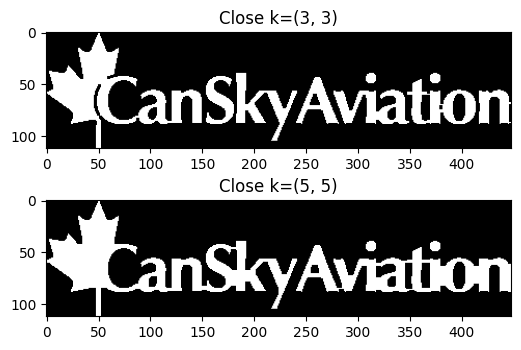

In [125]:
fig, axes = plt.subplots(2, 1, figsize=(6, 4))

for idx, kernel in enumerate(kernels):
    element = cv2.getStructuringElement(cv2.MORPH_RECT, kernel)
    img_close = cv2.morphologyEx(img_thresh, cv2.MORPH_CLOSE, element)

    axes[idx].imshow(img_close, cmap="gray")
    axes[idx].set_title(f"Close k={kernel}")

plt.show()

**Morphological gradient**

Useful for determining the outline of a particular object of an image

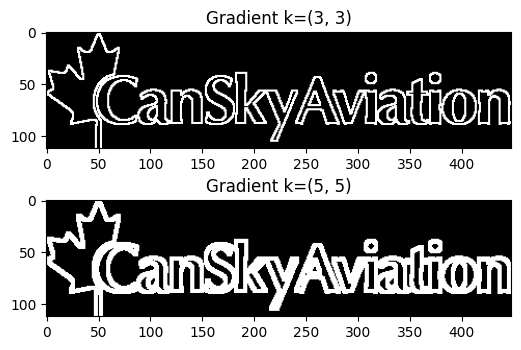

In [126]:
fig, axes = plt.subplots(2, 1, figsize=(6, 4))

for idx, kernel in enumerate(kernels):
    element = cv2.getStructuringElement(cv2.MORPH_RECT, kernel)
    img_gradient = cv2.morphologyEx(img_thresh, cv2.MORPH_GRADIENT, element)

    axes[idx].imshow(img_gradient, cmap="gray")
    axes[idx].set_title(f"Gradient k={kernel}")

plt.show()

**Top Hat / White Hat**

A top hat operation is used to reveal bright regions of an image on dark backgrounds.

In [142]:
element = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 5))
img_top_hat = cv2.morphologyEx(img_thresh, cv2.MORPH_TOPHAT, element)

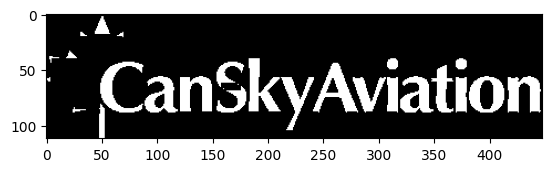

In [143]:
plt.imshow(img_top_hat, cmap="gray")
plt.show()

**Black Hat**

In [149]:
element = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 5))
img_black_hat = cv2.morphologyEx(img_thresh, cv2.MORPH_BLACKHAT, element)

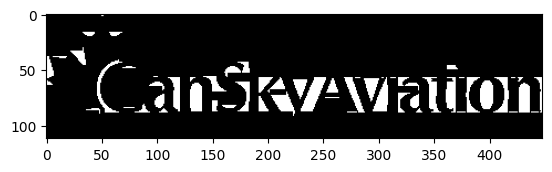

In [150]:
plt.imshow(img_black_hat, cmap="gray")
plt.show()

### References

- https://pyimagesearch.com/2021/01/19/image-arithmetic-opencv/
- https://pyimagesearch.com/2021/04/28/opencv-thresholding-cv2-threshold/
- https://pyimagesearch.com/2021/05/12/adaptive-thresholding-with-opencv-cv2-adaptivethreshold/
- https://pyimagesearch.com/2021/01/19/opencv-bitwise-and-or-xor-and-not/
- https://learnopencv.com/alpha-blending-using-opencv-cpp-python/
- https://pyimagesearch.com/2021/04/28/opencv-morphological-operations/